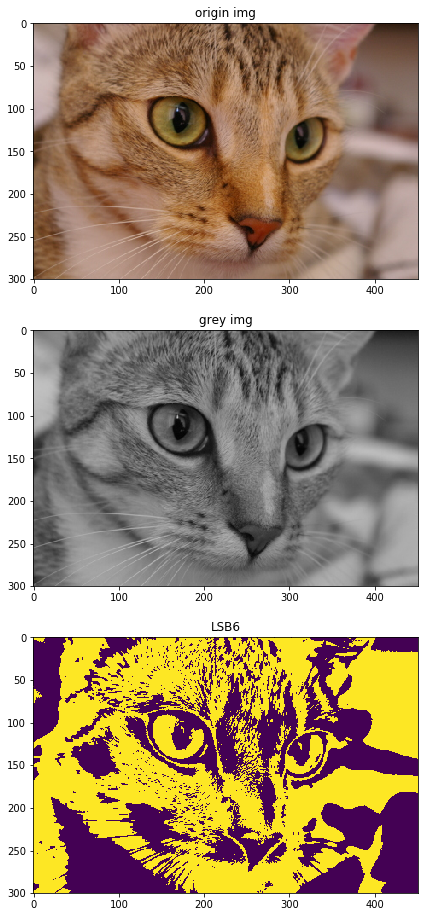

In [4]:
from skimage import io, data, img_as_ubyte
import matplotlib.pyplot as plt
import numpy as np

img = data.chelsea()
rows, cols, dims = img.shape
plt.figure(figsize = (16,16))

img_grey = img_as_ubyte(img.copy())
img_sample = img[:,:,0].copy()

def lsb(x):
    lsb_list = []
    for i in range(0,8):
        lsb_list.append(x % (2**(i+1)))
    for j in range(7,0,-1):
        lsb_list[j] = lsb_list[j] - lsb_list[j-1]
        if lsb_list[j] != 0 :
            if (lsb_list[j]%2) == 0:
                lsb_list[j] = 1
        else:
            lsb_list[j] = 0
            
    return lsb_list
                
for i in range(0,rows):
    for j in range(0,cols):
        sum = 0.0
        for k in range(0,3):
            sum = sum + img[i,j,k]
        
        img_grey[i,j] = sum/3
        img_sample[i,j] = sum/3
        lsb_list = lsb(img_sample[i,j])
        if lsb_list[6] == 1:
            img_sample[i,j] = 255
        else:
            img_sample[i,j] = 0
            
plt.subplot(3,1,1)
plt.title('origin img')
plt.imshow(img)

plt.subplot(3,1,2)
plt.title('grey img')
plt.imshow(img_grey)

plt.subplot(3,1,3)
plt.title('LSB6')
plt.imshow(img_sample)

plt.show()

In [5]:
import math

def ditance(clr1,clr2):
    dif = 0
    for i in range(0,3):
        dif = dif + math.pow((clr1[i] - clr2[i]),2)
    print(math.sqrt(dif))
    
black = [0,0,0]
red = [255,0,0]
green = [0,255,0]
blue = [0,0,255]
pink = [255,175,175]
white = [255,255,255]

ditance(black,white)
ditance(white,pink)
ditance(black,pink)

441.6729559300637
113.13708498984761
355.3519382246282


C:\Users\212\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


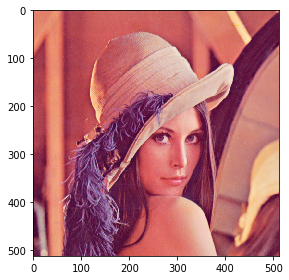

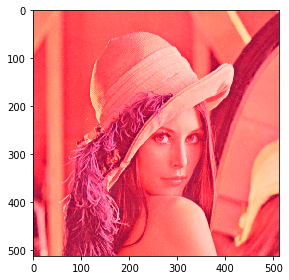

In [9]:
from skimage import io, data
import matplotlib.pyplot as plt
import numpy as np

img = io.imread('lena_std.bmp')
rows, cols, dims = img.shape
img2 = img.copy()
io.imshow(img)
for i in range(0,rows):
    for j in range(0,cols):
        new_blue = 2*img2[i,j,0]
        if new_blue>255:
            new_blue = 255
        img2[i,j,0] = new_blue
plt.figure()
io.imshow(img2)
io.show()

C:\Users\212\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


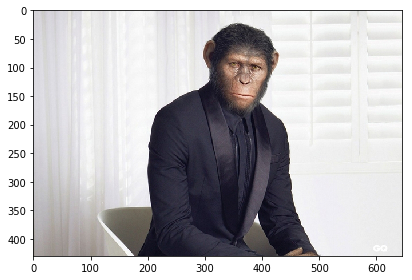

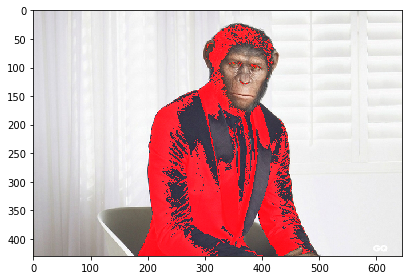

In [18]:
from skimage import io, data
import matplotlib.pyplot as plt
import numpy as np

def ditance(clr1,clr2):
    dif = 0
    for i in range(0,3):
        dif = dif + math.pow((clr1[i] - clr2[i]),2)
    return math.sqrt(dif)

def makeclr(img,brown):
    rows, cols, dims = img.shape
    for i in range(0,rows):
        for j in range(0,cols):
            if ditance(img[i,j],brown) < 50.0:
                img[i,j,0] = 255
    return img
    
img = io.imread('ape.jpg')
io.imshow(img)
brown = [45,25,15]
img2 = makeclr(img,brown)
plt.figure()
io.imshow(img2)
io.show()